# Pandas for Financial Time Series Data

## Pandas Data Structures

Pandas has three main data structures
- Series
- Dataframes
- Panels

In this course, we're going to study mainly series and dataframes. 
A series is the equivalent of a column in an Excel spreadsheet
A dataframe is the equivalent of a sheet in Excel.
A panel would be a data structure that contains multiple dataframes. 

Here we'll do just a quick example to show how easy it is to use Python to visualize data. 
To start out, we need to import the proper libraries.  In this case, we want the pandas library, the numpy library, and some plotting libraries. 
Matplotlib inline is simply a directive to the notebook to tell it to display the plots inside the notebook rather than from a separate window. 

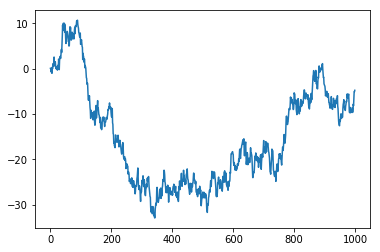

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a random array of 1000 values and do a cumulative sum over the array, then plot it. 
plt.plot(np.random.randn(1000).cumsum())


### Pandas Series

The first Pandas data structure we're going to look at is the Series.  Series are simple one dimensional vectors of data that we can manipulate. 

For example. 


In [5]:
index = ['First','Second','Third','Fourth']

s = pd.Series(np.arange(4), index=index)
s

First     0
Second    1
Third     2
Fourth    3
dtype: int64

Note that in the above Series, we've got an index for each row in the column that we've defined ourself.  Also note that the output shows that the data type for each row of data is a 64 bit integer. 
(dtype)

In [6]:
s.values

array([0, 1, 2, 3])

In [7]:
s.index

Index(['First', 'Second', 'Third', 'Fourth'], dtype='object')

Note that we can access each of the parts of the Series, such as the data and the index by using the '.' operator and the name of the attribute.  

We can also do math along the entire Series vector.   

In [8]:
s * s

First     0
Second    1
Third     4
Fourth    9
dtype: int64

In [9]:
s += 1
s

First     1
Second    2
Third     3
Fourth    4
dtype: int64

Often, we'd like to only use or access a portion of the series (called a *slice*)
To do this, we use the [ ] operator.  There are three arguments that you pass to this operator, separated by a ':'.  The *start* of the slice, the *end* of the slice, and the *step* operator. 
In both Python and Pandas, the end is subtracted by one. For example. 


In [10]:
list1 = ['a','b','c','d','e']
print (list1[0:4])
s = pd.Series(list1)
print (s[0:4])

['a', 'b', 'c', 'd']
0    a
1    b
2    c
3    d
dtype: object


If we don't specify an index for our Series, by default Pandas uses the whole number set increasing by one. 

We can skip any or all of the parameters to the [ ] operator. For example:

In [11]:
print (list1[:4])
s[:4]

['a', 'b', 'c', 'd']


0    a
1    b
2    c
3    d
dtype: object

If you don't specify the first number, Python assumes the first element of the data structure. 
If you don't specify the last number, Python assumes the last element of the data structure. 


In [12]:
print (list1[::-1])
s[::-1]

['e', 'd', 'c', 'b', 'a']


4    e
3    d
2    c
1    b
0    a
dtype: object

We can also access elements of our Series by putting in the index value like so:

In [13]:
s.index = ['fee','fi','fo','fum','foo']
print (s['foo'])


e


In [14]:
s.foo

'e'

We can also slice by index value. 

In [15]:
print (s['fi':])

fi     b
fo     c
fum    d
foo    e
dtype: object


### Pandas and datetime

The datetime stamp is one of the common fields in time series data.  Let's look at how this works. 
First, we'll show how to create a range of dates using the date_range method from Pandas. 


In [9]:
dates  = pd.date_range('2018-11-26','2018-07-07',dayfirst = False)
dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

Now, let's create some sample data, in this case, a series of Open, High, Low and Close data in our dataframe using the date time index.  Note that these values are just made up, and don't reflect real asset prices for the dates.

In [10]:
goog_prices = [998.02, 1001.56,994.51, 1001.22, 1002.25, 1003.61]
goog_stock_series = pd.Series(goog_prices, index=dates)
goog_stock_series

ValueError: Wrong number of items passed 6, placement implies 0

Note that we now have a datetime index rather than using a sequence of numbers or letters. 
Let's do a second stock.

In [ ]:
aapl_prices = [157.02, 158.56,159.51, 155.22, 152.25, 154.61]
aapl_stock_series = pd.Series(aapl_prices, index=dates)
aapl_stock_series

Note that we can combine these two series into a dataframe. 

In [ ]:
stock_df = pd.DataFrame({'GOOG': goog_stock_series, 'AAPL':aapl_stock_series})
stock_df

Note that in the above code, we created a datetime index, and created column headers by using a dictionary of key value pairs to do so.  Note that the dataframe also has a row index, just like the series. and also a column index. 

In [ ]:
stock_df.index

In [ ]:
stock_df.columns

We can also retrieve data from the dataframe by column index. 

In [ ]:
stock_df['GOOG']

    We can also retrieve colums by using the '.' operator rather than the [ ] operator.  For example

In [ ]:
stock_df.AAPL

Let's go a bit further.  Say that we now have both open and close data for each stock.  Let's create a dataframe that contains both.

In [ ]:
import random
# Create 30 days of stock prices for GOOG and AAPL. 
goog_open_prices = [ goog_prices [0] + random.uniform(1,4) for _ in range(30) ]
aapl_open_prices = [ aapl_prices [0] + random.uniform (1,2) for _ in range(30) ]
# Add a random shift to the open price to mock a close price.  Values are random numbers between
# -2 and 2.
goog_close_prices = [ round(price + random.uniform(1,4),2) for price in goog_open_prices ]
aapl_close_prices = [ round(price +random.uniform(1,2),2) for price in aapl_open_prices]
goog_open_prices

In [ ]:
goog_close_prices

In [ ]:
aapl_close_prices

In [ ]:
dates  = pd.date_range('2018-11-25','2018-12-24')
stock_df_columns = ['AAPL Open', 'AAPL Close', 'GOOG Open', 'GOOG Close']
stock_df = pd.DataFrame({'AAPL Open':aapl_open_prices,'AAPL Close':aapl_close_prices,
                                    'GOOG Open': goog_open_prices, 'GOOG Close': goog_close_prices},
                                     index=dates,columns = stock_df_columns)
stock_df

Now let's compute the difference between the open and close price for both Apple and Google and add these value as a new columns in our stock_df datframe


In [ ]:
stock_df['GOOG Diff'] = stock_df['GOOG Close'] - stock_df['GOOG Open']
stock_df['AAPL Diff'] = stock_df['AAPL Close'] - stock_df['AAPL Open']
stock_df

Let's do a couple of visualizations.  Let's plot  line graph for both Google and Apple showing both the open and close lines. 

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(stock_df['AAPL Open'], label = 'AAPL Open')
plt.plot(stock_df['AAPL Close'], label = 'AAPL Close')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price') 
plt.legend()

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(stock_df['GOOG Open'], label = 'GOOG Open')
plt.plot(stock_df['GOOG Close'], label = 'GOOG Close')
plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Price') 
plt.legend()

We can also use Pandas to immediately calculate some common statistical functions.  For example

In [ ]:
stock_df['GOOG Open'].mean()

In [ ]:
stock_df['AAPL Close'].median()

In [ ]:
stock_df['GOOG Close'].mode()

In numpy, mean(), median() and mode() all take as a parameter a number that defines whether we want to perform the operation over the columns or over the rows.  

In [ ]:
# 5 x 5 array of random numbers. 
test_array = np.random.randn(5,5)
print ('Mean value for entire array ',test_array.mean())
print ('Row mean values ', test_array.mean(0))
print ('Column mean values',test_array.mean(1))

In a Pandas dataframe, the default behavior (i.e. no parameter specified) is to compute the mean over the columns. Supplying a 1 computes the row means. 

In our previous stock data, if we subtract the daily price from the mean, we'll get the deviations from the mean for each timestamp. 

In [ ]:
stock_df - stock_df.mean()

One very nice feature of Pandas is boolean selection, i.e. We can select on rows or columns according to some boolean expression.  For example, if we want to select all rows where the price of AAPL close is > 158.50 USD, we can do the following.  

In [ ]:
#aapl_close = stock_df[stock_df['AAPL Close'] > 159.5]
stock_df['AAPL Close']
#print (aapl_close[aapl_close > 159.5])

In [ ]:
#stock_df[[]list of columns]]
new_series = stock_df[(stock_df['GOOG Close'] > 999.99) & (stock_df['AAPL Close'] > 158.50)].apply(lambda x: x + 1)
new_series

### Reading data from a csv file into a Pandas dataframe

To read data from a csv file into a Pandas dataframe, we can use the 'read_csv' method.  For example, 
we've written the stock data to a file called 'stock_data.csv'.  Let's read that file from the disk into our stock_df dataframe. Note that we need to set the first column (The date column) to be our index, and then, we rename it to Date. 

In [ ]:
!cat ../data/stock_data.csv

In [ ]:
stock_df = pd.read_csv('../data/stock_data.csv')
stock_df.set_index('Unnamed: 0',inplace=True)
stock_df.index.names = ['Date']
stock_df

But we have a problem.  As shown below, when I read in the csv file, the index type is a string.  If we're working with time series data, we really need to change this to a DateTime python object. 

In [ ]:
type (stock_df.index[0])

In [ ]:
stock_df.index = pd.to_datetime(stock_df.index)
type(stock_df.index[0])

In [ ]:
stock_df.head()

Note that an index is not accessible as column data.  What if I want both?   The date as the index as well as a separate column?

Here's the quick solution

In [ ]:
stock_df = pd.read_csv('../data/stock_data.csv')
stock_df.set_index('Unnamed: 0',inplace = True, drop = False)
stock_df.columns = ['Date', 'AAPL Open', 'AAPL Close','GOOG Open','GOOG Close','AAPL Diff','GOOG Diff']
stock_df.index.names = ['Date']
stock_df.index = pd.to_datetime(stock_df.index)
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df.head(6)

### Date and Time stamps in Pandas

In Numpy, date and time stamps are represented by an eight byte number. 
You can create them by instantiating a datetime64 object.

In Pandas, Datetime stamps represent a 600 year period from 1700-2300 A.D. 
Finest granularity are nanoseconds. 
Nanoseconds are important in time series databases such as KDB and some others. 


In Pandas, we can create datetime indexes.  All of the scalar values from the datetime index are timestamps. 

Pandas also supports duplicate timestamps. 

Pandas timestamps inherit from the datetime.datetime class in Python.
We can create our own timestamps using Pandas.  For example:

In [19]:
import pandas as pd
from datetime import datetime
pd.Timestamp('03/01/2018 14:01:43')

Timestamp('2018-03-01 14:01:43')

In [20]:
stamp = pd.Timestamp('03/01/2018 14:01:43')
stamp.value # Value in Nanoseconds. 

1519912903000000000

Here we can convert a list of dates into an index in a series. Note we use the pd.to_datetime() method to convert the strings into timestamps.  Using isinstance shows that, in fact, converted strings to datetime time stamps. 

In [21]:
dates = ['2018-12-25', '2019-01-01', '2019-01-02', '2019-01-03']
dates

['2018-12-25', '2019-01-01', '2019-01-02', '2019-01-03']

In [22]:
ts = pd.Series(range(4), index=pd.to_datetime(dates))
ts

2018-12-25    0
2019-01-01    1
2019-01-02    2
2019-01-03    3
dtype: int64

In [23]:
isinstance(ts.index[0],datetime)

True

### More on timeseries indexing. 
Here we'll create a range of dates.

In [24]:
date_range = pd.date_range('2015-01-01', periods=1000)
date_range

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2017-09-17', '2017-09-18', '2017-09-19', '2017-09-20',
               '2017-09-21', '2017-09-22', '2017-09-23', '2017-09-24',
               '2017-09-25', '2017-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

Note that date_range is a list of datetime objects, with a frequency of 'D', or daily. 
Now let's create a series with 1000 random numbers. 

In [25]:
import numpy as np
ts  = pd.Series(np.arange(1000), index = date_range)
ts

2015-01-01      0
2015-01-02      1
2015-01-03      2
2015-01-04      3
2015-01-05      4
2015-01-06      5
2015-01-07      6
2015-01-08      7
2015-01-09      8
2015-01-10      9
2015-01-11     10
2015-01-12     11
2015-01-13     12
2015-01-14     13
2015-01-15     14
2015-01-16     15
2015-01-17     16
2015-01-18     17
2015-01-19     18
2015-01-20     19
2015-01-21     20
2015-01-22     21
2015-01-23     22
2015-01-24     23
2015-01-25     24
2015-01-26     25
2015-01-27     26
2015-01-28     27
2015-01-29     28
2015-01-30     29
             ... 
2017-08-28    970
2017-08-29    971
2017-08-30    972
2017-08-31    973
2017-09-01    974
2017-09-02    975
2017-09-03    976
2017-09-04    977
2017-09-05    978
2017-09-06    979
2017-09-07    980
2017-09-08    981
2017-09-09    982
2017-09-10    983
2017-09-11    984
2017-09-12    985
2017-09-13    986
2017-09-14    987
2017-09-15    988
2017-09-16    989
2017-09-17    990
2017-09-18    991
2017-09-19    992
2017-09-20    993
2017-09-21

In [34]:
pd.__version__

'0.22.0'

We can now access elements of the series via the datetime index.  There are many ways to specify this.  We can specify this by passing in a datetime object. 

In [26]:
ts[datetime(2016,10,5)]n

643

We can specify it by passing in the datetime as a string. 

In [27]:
ts['2016-10-5']

643

We can also pass in the colunm value related to the index. 

In [28]:
ts[643]

643

We can slice the time series by dates. 

In [29]:
ts['2016-10-5':]

2016-10-05    643
2016-10-06    644
2016-10-07    645
2016-10-08    646
2016-10-09    647
2016-10-10    648
2016-10-11    649
2016-10-12    650
2016-10-13    651
2016-10-14    652
2016-10-15    653
2016-10-16    654
2016-10-17    655
2016-10-18    656
2016-10-19    657
2016-10-20    658
2016-10-21    659
2016-10-22    660
2016-10-23    661
2016-10-24    662
2016-10-25    663
2016-10-26    664
2016-10-27    665
2016-10-28    666
2016-10-29    667
2016-10-30    668
2016-10-31    669
2016-11-01    670
2016-11-02    671
2016-11-03    672
             ... 
2017-08-28    970
2017-08-29    971
2017-08-30    972
2017-08-31    973
2017-09-01    974
2017-09-02    975
2017-09-03    976
2017-09-04    977
2017-09-05    978
2017-09-06    979
2017-09-07    980
2017-09-08    981
2017-09-09    982
2017-09-10    983
2017-09-11    984
2017-09-12    985
2017-09-13    986
2017-09-14    987
2017-09-15    988
2017-09-16    989
2017-09-17    990
2017-09-18    991
2017-09-19    992
2017-09-20    993
2017-09-21

In [30]:
ts['2016-10-5':'2017-01-01']

2016-10-05    643
2016-10-06    644
2016-10-07    645
2016-10-08    646
2016-10-09    647
2016-10-10    648
2016-10-11    649
2016-10-12    650
2016-10-13    651
2016-10-14    652
2016-10-15    653
2016-10-16    654
2016-10-17    655
2016-10-18    656
2016-10-19    657
2016-10-20    658
2016-10-21    659
2016-10-22    660
2016-10-23    661
2016-10-24    662
2016-10-25    663
2016-10-26    664
2016-10-27    665
2016-10-28    666
2016-10-29    667
2016-10-30    668
2016-10-31    669
2016-11-01    670
2016-11-02    671
2016-11-03    672
             ... 
2016-12-03    702
2016-12-04    703
2016-12-05    704
2016-12-06    705
2016-12-07    706
2016-12-08    707
2016-12-09    708
2016-12-10    709
2016-12-11    710
2016-12-12    711
2016-12-13    712
2016-12-14    713
2016-12-15    714
2016-12-16    715
2016-12-17    716
2016-12-18    717
2016-12-19    718
2016-12-20    719
2016-12-21    720
2016-12-22    721
2016-12-23    722
2016-12-24    723
2016-12-25    724
2016-12-26    725
2016-12-27

Let's shuffle the time stamps in some random fashion. 

In [31]:
ts2 = ts.take(np.random.permutation(len(ts)))
ts2

2016-07-25    571
2015-08-27    238
2017-02-05    766
2015-04-11    100
2016-08-20    597
2016-12-31    730
2015-08-17    228
2016-04-25    480
2017-04-11    831
2017-09-20    993
2015-12-10    343
2017-01-17    747
2016-03-16    440
2015-08-06    217
2016-03-03    427
2016-02-12    407
2015-02-16     46
2016-11-01    670
2015-01-29     28
2015-08-01    212
2015-12-26    359
2017-07-01    912
2016-10-15    653
2016-01-22    386
2016-06-07    523
2015-03-14     72
2015-07-03    183
2017-06-18    899
2016-12-28    727
2017-07-08    919
             ... 
2015-07-04    184
2016-06-25    541
2015-06-16    166
2016-09-21    629
2017-06-19    900
2016-05-08    493
2015-07-28    208
2016-06-15    531
2016-08-31    608
2015-12-29    362
2016-10-04    642
2015-05-25    144
2016-08-28    605
2015-04-14    103
2015-03-02     60
2016-07-02    548
2015-06-08    158
2015-04-16    105
2015-03-08     66
2015-11-22    325
2015-10-21    293
2017-02-25    786
2015-10-04    276
2015-08-02    213
2017-05-22

Note that if we slice on this, originally Pandas would throw a TimeSeriesIndex error, but now it does its best to return values within the range of the slice indices. 

In [33]:
ts2['2015-01-01':'2016-01-01']

2015-08-27    238
2015-04-11    100
2015-08-17    228
2015-12-10    343
2015-08-06    217
2015-02-16     46
2015-01-29     28
2015-08-01    212
2015-12-26    359
2015-03-14     72
2015-07-03    183
2015-10-31    303
2015-11-12    315
2015-05-16    135
2015-05-01    120
2015-07-29    209
2015-02-17     47
2015-04-02     91
2015-07-08    188
2015-04-12    101
2015-06-30    180
2015-02-05     35
2015-11-28    331
2015-06-14    164
2015-10-24    296
2015-01-23     22
2015-01-04      3
2015-01-22     21
2015-12-23    356
2015-01-06      5
             ... 
2015-06-27    177
2015-08-12    223
2015-04-07     96
2015-02-11     41
2015-06-05    155
2015-08-14    225
2015-05-28    147
2015-04-28    117
2015-09-02    244
2015-03-10     68
2015-05-13    132
2015-07-12    192
2015-01-27     26
2015-09-09    251
2015-11-14    317
2015-07-04    184
2015-06-16    166
2015-07-28    208
2015-12-29    362
2015-05-25    144
2015-04-14    103
2015-03-02     60
2015-06-08    158
2015-04-16    105
2015-03-08

Note that we can select by just year and month and pandas will return all days in that range.  For example:

In [35]:
ts['2016-01']

2016-01-01    365
2016-01-02    366
2016-01-03    367
2016-01-04    368
2016-01-05    369
2016-01-06    370
2016-01-07    371
2016-01-08    372
2016-01-09    373
2016-01-10    374
2016-01-11    375
2016-01-12    376
2016-01-13    377
2016-01-14    378
2016-01-15    379
2016-01-16    380
2016-01-17    381
2016-01-18    382
2016-01-19    383
2016-01-20    384
2016-01-21    385
2016-01-22    386
2016-01-23    387
2016-01-24    388
2016-01-25    389
2016-01-26    390
2016-01-27    391
2016-01-28    392
2016-01-29    393
2016-01-30    394
2016-01-31    395
Freq: D, dtype: int64

Or, we can slice on multiple months.

In [36]:
ts['2016-01':'2016-03']

2016-01-01    365
2016-01-02    366
2016-01-03    367
2016-01-04    368
2016-01-05    369
2016-01-06    370
2016-01-07    371
2016-01-08    372
2016-01-09    373
2016-01-10    374
2016-01-11    375
2016-01-12    376
2016-01-13    377
2016-01-14    378
2016-01-15    379
2016-01-16    380
2016-01-17    381
2016-01-18    382
2016-01-19    383
2016-01-20    384
2016-01-21    385
2016-01-22    386
2016-01-23    387
2016-01-24    388
2016-01-25    389
2016-01-26    390
2016-01-27    391
2016-01-28    392
2016-01-29    393
2016-01-30    394
             ... 
2016-03-02    426
2016-03-03    427
2016-03-04    428
2016-03-05    429
2016-03-06    430
2016-03-07    431
2016-03-08    432
2016-03-09    433
2016-03-10    434
2016-03-11    435
2016-03-12    436
2016-03-13    437
2016-03-14    438
2016-03-15    439
2016-03-16    440
2016-03-17    441
2016-03-18    442
2016-03-19    443
2016-03-20    444
2016-03-21    445
2016-03-22    446
2016-03-23    447
2016-03-24    448
2016-03-25    449
2016-03-26

We can also use the loc() and iloc() methods to select rows in the dataframe (Note that the ix() method has been deprecated in Pandas since version 0.20.)
Let's create a new dataframe with four columns and a timestamp index. 
Each column will be a stock symbol generated with random values between 100.01 USD and 103.90 USD. 


In [81]:
import random
rng =  pd.date_range('2015-01-01',periods=1000)
symbols=['AAPL','GOOG','IBM','FB']
df  = pd.DataFrame(np.arange(4000).reshape(1000,4),index=rng,columns=symbols)
df[symbols] = df[symbols].applymap(lambda v: round(random.uniform(100.01,103.90),2))
df.head()

,AAPL,GOOG,IBM,FB
2015-01-01,101.98,103.50,100.12,103.14
2015-01-02,100.52,102.77,103.14,102.00
2015-01-03,103.60,101.13,102.69,100.18
2015-01-04,100.89,100.83,102.23,103.07
2015-01-05,103.15,101.01,100.26,101.96


Now let's use the loc and iloc methods to select values in the dataframe from the timeseries index.

In [51]:
df.iloc[0:10]

,AAPL,GOOG,IBM,FB
2015-01-01,100.46,103.49,100.30,100.57
2015-01-02,103.12,102.13,102.60,102.34
2015-01-03,100.33,101.93,101.53,102.49
2015-01-04,101.16,100.86,101.42,100.39
2015-01-05,100.82,102.96,100.82,103.48
2015-01-06,101.62,102.66,103.89,102.78
2015-01-07,102.56,102.08,101.05,100.14
2015-01-08,103.60,101.34,100.97,100.97
2015-01-09,101.89,100.50,101.73,100.78
2015-01-10,101.98,102.94,101.48,100.34


In [52]:
df.loc['2015-01-01':'2015-01-10']

,AAPL,GOOG,IBM,FB
2015-01-01,100.46,103.49,100.30,100.57
2015-01-02,103.12,102.13,102.60,102.34
2015-01-03,100.33,101.93,101.53,102.49
2015-01-04,101.16,100.86,101.42,100.39
2015-01-05,100.82,102.96,100.82,103.48
2015-01-06,101.62,102.66,103.89,102.78
2015-01-07,102.56,102.08,101.05,100.14
2015-01-08,103.60,101.34,100.97,100.97
2015-01-09,101.89,100.50,101.73,100.78
2015-01-10,101.98,102.94,101.48,100.34


Note that we don't have to use loc and iloc.  We can select rows by a number of different methods. 
For example, using the datetime method to convert strings into datetime objects and then slicing on them. 

In [53]:
df[datetime(2015,1,1):datetime(2015,1,10)]

,AAPL,GOOG,IBM,FB
2015-01-01,100.46,103.49,100.30,100.57
2015-01-02,103.12,102.13,102.60,102.34
2015-01-03,100.33,101.93,101.53,102.49
2015-01-04,101.16,100.86,101.42,100.39
2015-01-05,100.82,102.96,100.82,103.48
2015-01-06,101.62,102.66,103.89,102.78
2015-01-07,102.56,102.08,101.05,100.14
2015-01-08,103.60,101.34,100.97,100.97
2015-01-09,101.89,100.50,101.73,100.78
2015-01-10,101.98,102.94,101.48,100.34


### Time Series Frequencies

Up until now, all of our time series ranges have been on a fixed frequency.  However, it is often the case that we will want a frequency that isn't strictly linear or consecutive.  For example with time series asset data, we will only want time periods that are on a business week cycle rather than a strict calendar cycle. 

In our first example, let's generate time periods that are monthly, rather than daily. 

In [58]:
rng = pd.date_range(datetime(2015,1,1),datetime(2015,12,31), period=12, freq = 'M ')
rng

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

Note that in the previous example, it generates appropriate month end dates. 

We can also do the start of the month rather than the end of the month. 

In [60]:
rng = pd.date_range(datetime(2015,1,1),datetime(2015,12,31), period=12, freq = 'SM ')
list(rng)

[Timestamp('2015-01-15 00:00:00', freq='SM-15'),
 Timestamp('2015-01-31 00:00:00', freq='SM-15'),
 Timestamp('2015-02-15 00:00:00', freq='SM-15'),
 Timestamp('2015-02-28 00:00:00', freq='SM-15'),
 Timestamp('2015-03-15 00:00:00', freq='SM-15'),
 Timestamp('2015-03-31 00:00:00', freq='SM-15'),
 Timestamp('2015-04-15 00:00:00', freq='SM-15'),
 Timestamp('2015-04-30 00:00:00', freq='SM-15'),
 Timestamp('2015-05-15 00:00:00', freq='SM-15'),
 Timestamp('2015-05-31 00:00:00', freq='SM-15'),
 Timestamp('2015-06-15 00:00:00', freq='SM-15'),
 Timestamp('2015-06-30 00:00:00', freq='SM-15'),
 Timestamp('2015-07-15 00:00:00', freq='SM-15'),
 Timestamp('2015-07-31 00:00:00', freq='SM-15'),
 Timestamp('2015-08-15 00:00:00', freq='SM-15'),
 Timestamp('2015-08-31 00:00:00', freq='SM-15'),
 Timestamp('2015-09-15 00:00:00', freq='SM-15'),
 Timestamp('2015-09-30 00:00:00', freq='SM-15'),
 Timestamp('2015-10-15 00:00:00', freq='SM-15'),
 Timestamp('2015-10-31 00:00:00', freq='SM-15'),
 Timestamp('2015-11-

We can also do periods by weekdays. i.e. normal business days. 

In [63]:
rng = pd.date_range(datetime(2015,1,1),datetime(2015,12,31), period=12, freq = 'BM ')
rng

DatetimeIndex(['2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30',
               '2015-05-29', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-30', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='BM')

Or, we can also do business start of the month.

In [64]:
rng = pd.date_range(datetime(2015,1,1),datetime(2015,12,31), period=12, freq = 'BMS ')
rng

DatetimeIndex(['2015-01-01', '2015-02-02', '2015-03-02', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-03',
               '2015-09-01', '2015-10-01', '2015-11-02', '2015-12-01'],
              dtype='datetime64[ns]', freq='BMS')

Note that if you want to check for holidays, it's a bit more involved since each country has its own, specific holidays.  In the following example, we can import the United States federal holiday calendar. 
Once we've done that, we can use it to do boolean searches and modify our dataframe to exclude specific days. 

In [13]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
rng =  pd.date_range('2015-01-01',periods=1000)
symbols=['AAPL','GOOG','IBM','FB']
cal = calendar()
df  = pd.DataFrame(np.arange(4000).reshape(1000,4),index=rng,columns=symbols)
df[symbols] = df[symbols].applymap(lambda v: round(random.uniform(100.01,103.90),2))
holidays = cal.holidays(start=df.index.min(), end=df.index.max())
df.drop(df[df.index.isin(holidays)].index,inplace=True)
df.head(30)

,AAPL,GOOG,IBM,FB
2015-01-02,100.95,100.61,101.23,103.02
2015-01-03,100.05,103.43,100.15,103.47
2015-01-04,102.79,102.46,100.30,101.29
2015-01-05,102.91,100.91,100.89,101.07
2015-01-06,100.15,102.94,102.10,102.47
2015-01-07,103.58,101.97,103.61,102.30
2015-01-08,100.68,103.18,102.23,101.89
2015-01-09,103.90,103.21,101.34,103.42
2015-01-10,100.64,102.21,100.02,102.69
2015-01-11,101.17,101.69,100.79,102.18


Note that in the above output, the date '01-01-2015' isn't displayed as it is a holiday. Also notice that January 19th is also ommitted as that day was designated a US federal holiday (Martin Luther King day). 

### Resampling data

Often times, we'll get time series data, in, for example a day periodicity, and we'd like to take that data and sample it weekly or monthly.  This is called *resampling.*  Here we see how to do that in Pandas. 

Lets take our example of Apple and Google stock prices that has 1000 entries in it.  

In [102]:
import random
import pandas as pd
import numpy as np
import random
goog_price = 998.02
aapl_price = 157.02
# Create 30 days of stock prices for GOOG and AAPL. 
goog_open_prices = [ round(goog_price + random.uniform(1,1.5),2) for _ in range(1000) ]
aapl_open_prices = [ round(aapl_price + random.uniform (1,1.5),2) for _ in range(1000) ]
# Add a random shift to the open price to mock a close price.  Values are random numbers between
# -2 and 2.
goog_close_prices = [ round(price + random.uniform(1,4),2) for price in goog_open_prices ]
aapl_close_prices = [ round(price +random.uniform(1,2),2) for price in aapl_open_prices]

In [103]:
d_range = pd.date_range('2016-01-01',periods=1000)
stocks = pd.DataFrame(columns = ['AAPL_OPEN', 'AAPL_CLOSE', 'GOOG_OPEN','GOOG_CLOSE'],index=d_range)
stocks['AAPL_OPEN']  = aapl_open_prices
stocks['AAPL_CLOSE']  = aapl_close_prices
stocks['GOOG_OPEN']  = goog_open_prices
stocks['GOOG_CLOSE']  = goog_close_prices

Now let's plot the apple and google prices as a line chart. 

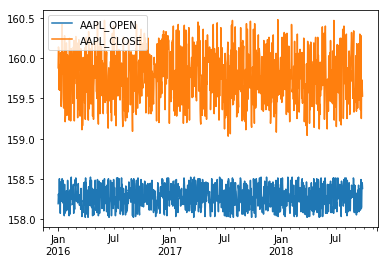

In [104]:
stocks[['AAPL_OPEN','AAPL_CLOSE']].plot()

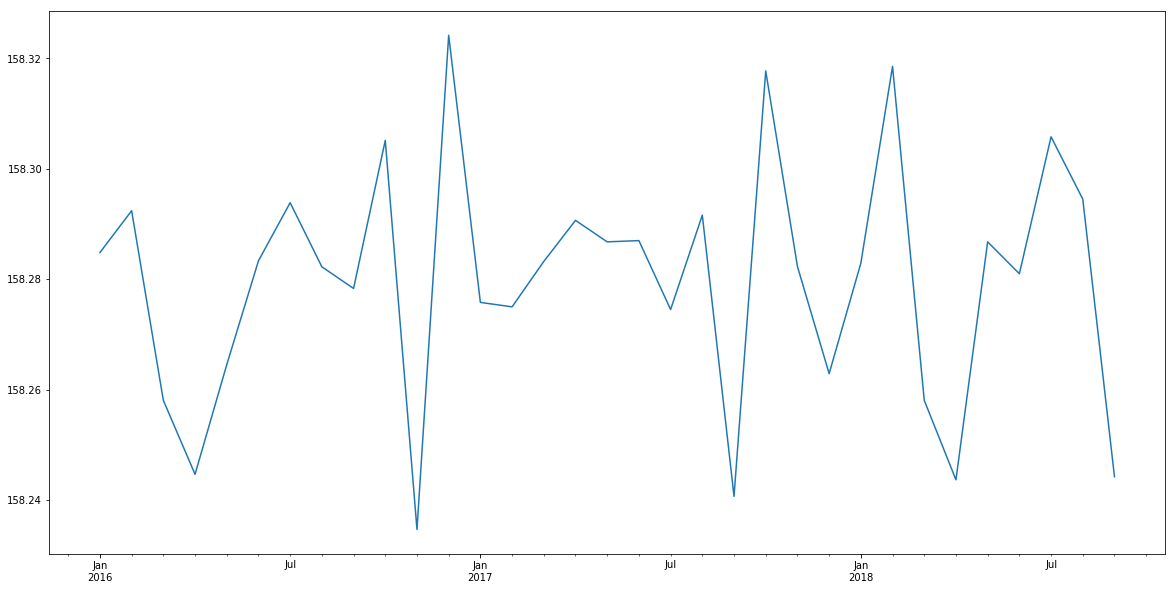

In [106]:
resample_aapl_open = stocks['AAPL_OPEN'].resample('M').mean()
fig= plt.figure(figsize=(20,10))
ax1=plt.subplot2grid((1,1),(0,0))
#stocks['AAPL_OPEN'].plot(ax=ax1,label='Daily Price')
resample_aapl_open.plot(ax=ax1,label = 'Monthly Mean')

In the above example, we took some daily time series and resampled it using the resample() method.  In this case, we resampled it to business month end and took the mean value of each of the sample 'buckets'. 

Generally there are two types of resampling:

 - Upsampling. Going from a lower frequency to a higher frequency (ex. days to hours)
 - Downsampling. Going from a higher frequency to a lower frequency (ex. days to months). 
 
There are many aggregate functions that can be supplied.  The default in Pandas for resampling is the mean.  However, others can be supplied, such as the median value, or the last value in the sample bin. 
Also, customized functions can be supplied, for example computing open, high, low and close values for an asset time series.  Here is an example of doing our resampling using the median rather than the mean. 
 



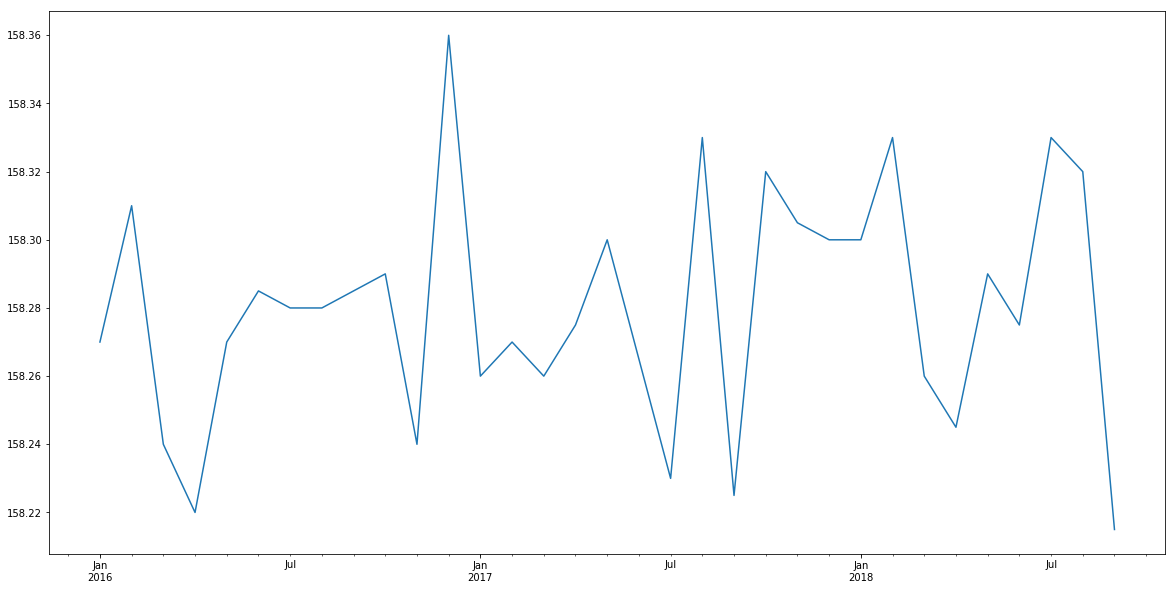

In [109]:
resample_aapl_open = stocks['AAPL_OPEN'].resample('M').median()
fig= plt.figure(figsize=(20,10))
ax1=plt.subplot2grid((1,1),(0,0))
#stocks['AAPL_OPEN'].plot(ax=ax1,label='Daily Price')
resample_aapl_open.plot(ax=ax1,label = 'Monthly Median')

Note that if we want to use a custom aggregation function we call the *apply()* method and pass the custom function in as a parameter. 

It is entirely possible that our resampling will produce uneven counts in either the first or last bin.  Pandas allows us some flexiblity as to which bin we can choose as the one with the uneven count.
In the next example, we tell the resample method that we want the uneven bin count to be the last bin in the series, rather than the first as we've 'closed' the first bin. 

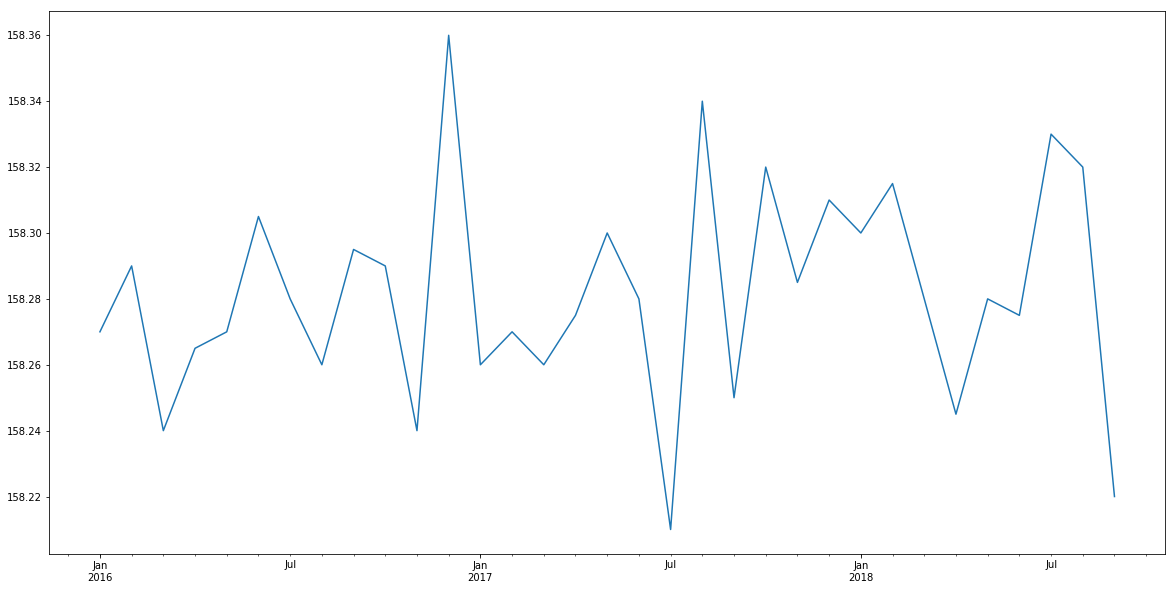

In [111]:
resample_aapl_open = stocks['AAPL_OPEN'].resample('M',closed='left').median()
fig= plt.figure(figsize=(20,10))
ax1=plt.subplot2grid((1,1),(0,0))
#stocks['AAPL_OPEN'].plot(ax=ax1,label='Daily Price')
resample_aapl_open.plot(ax=ax1,label = 'Monthly Median')

We can also use the *agg()* method to pass multiple aggregate functions which will return a dataframe of the output to us.  For example:

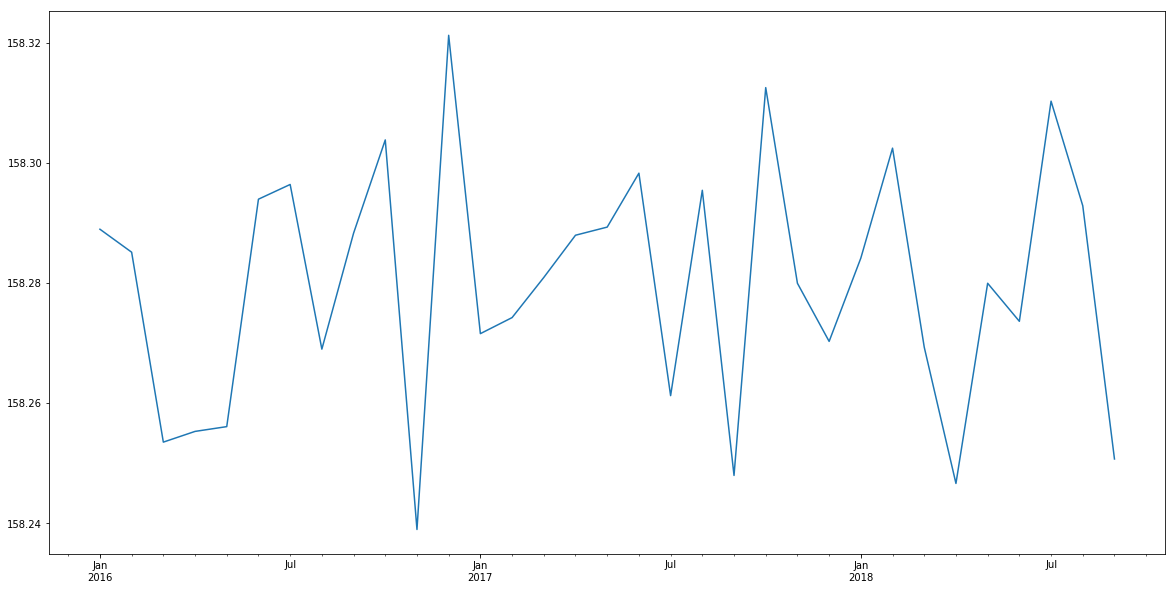

In [129]:
resample_aapl = stocks['AAPL_OPEN'].resample('M',closed='left').agg({'median': 'median',
                                                                                                               'mean':'mean'})
fig= plt.figure(figsize=(20,10))
ax1=plt.subplot2grid((1,1),(0,0))
#stocks['AAPL_OPEN'].plot(ax=ax1,label='Daily Price')
resample_aapl['mean'].plot(ax=ax1,label = 'Monthly Median')
#type(resample_aapl)
#resample_aapl['mean']

Note that upsampling will create a number of 'holes' in the resultant dataframe or series.  By default, Pandas will fill those holes with NaN's. We can use previously discussed methods such as *ffill()* and *bfill()* to forward fill or back fill the values. 

### Period Logic
